In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [9]:
# INITIAL DATA 
df = pd.read_csv("VeVe NFT Spreadsheet.csv")
df

,NFT,Rarity,Quantity,Veve Price,% Gain from Veve Price,Recent Price Movement,Trend!,12/1,11/24,11/16,...,9/23,9/19,9/18,9/17,9/15,9/12,9/9,9/3,8/29,8/26
0,Marvel Comics: Classic,Common,48000,$ 6.99,1187.55%,0.00%,NaN,$ 90.00,$ 90.00,$ 75.00,...,$ 64.00,$ 65.00,$ 58.00,$ 62.00,$ 36.00,$ 35.00,$ 15.00,$ 16.00,$ 14.00,$ 10.00
1,Marvel Comics: Vintage,Uncommon,6000,$ 6.99,2475.11%,-12.20%,NaN,$ 180.00,$ 205.00,$ 174.00,...,$ 217.00,$ 154.00,$ 109.00,$ 129.00,$ 82.00,$ 86.00,$ 28.00,$ 33.00,$ 25.00,$ 24.00
2,Marvel Comics: Hero,Rare,3000,$ 6.99,5550.93%,-15.42%,NaN,$ 395.00,$ 467.00,$ 625.00,...,$ 660.00,$ 345.00,$ 320.00,$ 274.00,$ 269.00,$ 286.00,$ 138.00,$ 150.00,$ 63.00,$ 60.00
3,Marvel Comics: Vibranium,Ultra Rare,2400,$ 6.99,15622.46%,-26.19%,NaN,"$ 1,099.00","$ 1,489.00","$ 1,399.00",...,"$ 2,199.00",$ 889.00,$ 715.00,$ 750.00,$ 605.00,$ 725.00,$ 290.00,$ 443.00,$ 160.00,$ 165.00
4,Marvel Comics: True Believer,Secret Rare,600,$ 6.99,429070.24%,-13.01%,NaN,"$ 29,999.00","$ 34,485.00","$ 30,000.00",...,"$ 40,000.00","$ 19,000.00","$ 14,450.00","$ 13,999.00","$ 14,500.00","$ 13,777.00","$ 14,999.00","$ 18,000.00","$ 6,500.00","$ 3,450.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Uncanny X-Men #129: Classic,Common,21000,$ 6.99,28.76%,NaN,NaN,$ 9.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Uncanny X-Men #129: Vintage,Uncommon,5000,$ 6.99,114.59%,NaN,NaN,$ 15.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,Uncanny X-Men #129: Hero,Rare,2350,$ 6.99,472.25%,NaN,NaN,$ 40.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,Uncanny X-Men #129: Vibranium,Ultra Rare,1050,$ 6.99,1430.76%,NaN,NaN,$ 107.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# CLEANING THE DATA
def clean_data(df):
    df_copy = df.copy()
    df_copy["Rarity"] = df_copy["Rarity"].replace({"Common":1, "Uncommon":2, "Rare":3, "Ultra Rare":4, "Secret Rare": 5})
    new_df = df_copy.loc[:, df.columns != "NFT"]
    for x in new_df.columns:
        if isinstance(new_df[x][0], str):
            if "%" in new_df[x][0]:
                new_df[x] = new_df[x].str.rstrip('%').astype('float') / 100.0
            else:
                new_df[x] = new_df[x].str.replace('$', '')
                new_df[x] = new_df[x].str.replace(',', '')
                new_df[x] = new_df[x].astype(float)
    new_df.insert(0,'NFT',df_copy["NFT"])
    new_df = new_df.drop(columns=['Trend!']).fillna(0)
    return new_df

In [30]:
new_df = clean_data(df)
new_df

,NFT,Rarity,Quantity,Veve Price,% Gain from Veve Price,Recent Price Movement,12/1,11/24,11/16,11/9,...,9/23,9/19,9/18,9/17,9/15,9/12,9/9,9/3,8/29,8/26
0,Marvel Comics: Classic,1,48000,6.99,11.8755,0.0000,90.0,90.0,75.0,52.0,...,64.0,65.0,58.0,62.0,36.0,35.0,15.0,16.0,14.0,10.0
1,Marvel Comics: Vintage,2,6000,6.99,24.7511,-0.1220,180.0,205.0,174.0,108.0,...,217.0,154.0,109.0,129.0,82.0,86.0,28.0,33.0,25.0,24.0
2,Marvel Comics: Hero,3,3000,6.99,55.5093,-0.1542,395.0,467.0,625.0,298.0,...,660.0,345.0,320.0,274.0,269.0,286.0,138.0,150.0,63.0,60.0
3,Marvel Comics: Vibranium,4,2400,6.99,156.2246,-0.2619,1099.0,1489.0,1399.0,1099.0,...,2199.0,889.0,715.0,750.0,605.0,725.0,290.0,443.0,160.0,165.0
4,Marvel Comics: True Believer,5,600,6.99,4290.7024,-0.1301,29999.0,34485.0,30000.0,41999.0,...,40000.0,19000.0,14450.0,13999.0,14500.0,13777.0,14999.0,18000.0,6500.0,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Uncanny X-Men #129: Classic,1,21000,6.99,0.2876,0.0000,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,Uncanny X-Men #129: Vintage,2,5000,6.99,1.1459,0.0000,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,Uncanny X-Men #129: Hero,3,2350,6.99,4.7225,0.0000,40.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,Uncanny X-Men #129: Vibranium,4,1050,6.99,14.3076,0.0000,107.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Rarity', ylabel='11/9'>

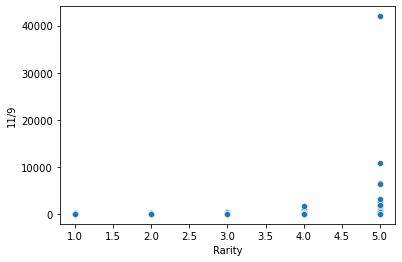

In [31]:
sns.scatterplot(data=new_df, x = "Rarity", y = "11/9")

<AxesSubplot:xlabel='Rarity', ylabel='11/9'>

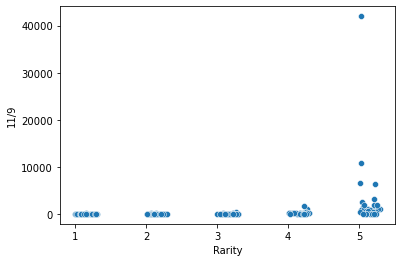

In [32]:
df_jit = new_df.copy()
df_jit["Rarity"] += np.random.random(df_jit.shape[0]) * 0.3
df_jit["11/9"] += np.random.random(df_jit.shape[0]) * 0.3
sns.scatterplot(data=df_jit, x="Rarity", y="11/9")

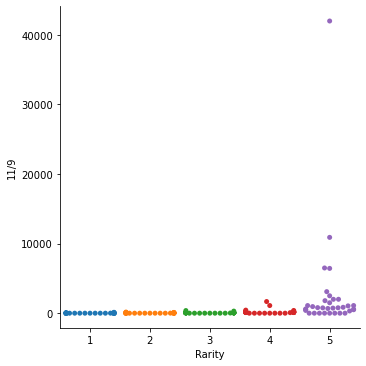

In [33]:
ax1=sns.catplot(data=new_df, kind="swarm", x="Rarity", y="11/9")

In [34]:
def select_comic(new_df, name):
    dd = new_df.loc[new_df["NFT"] == name]
    df1 = dd.iloc[:, 7:]
    df1 = df1[df1.columns[::-1]].T
    df1 = df1.rename(columns={df1.columns[0]: "Price"})
    return df1

In [35]:
def floor_prices(df):
    fp = []
    length = np.arange(len(df["Price"]))
    for l in length:
        if df["Price"][l] != 0:
            fp.append(df["Price"][l]) 
    return fp

In [36]:
def plot_fp(df, fp):
    dates = len(floor_prices(df)) + 1
    date_fp = df[-dates:]
    date_fp[date_fp.columns[::-1]].plot()
    plt.axhline(np.mean(floor_prices(df)), ls='--', linewidth=3, color='red')
    return np.mean(floor_prices(df))

96.5

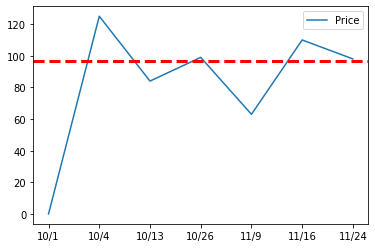

In [37]:
dare = select_comic(new_df, "Daredevil #1: Hero")
fp_dare = floor_prices(dare)
plot_fp(dare, fp_dare)

21.166666666666668

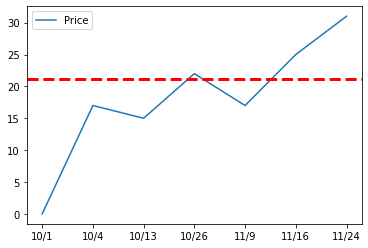

In [38]:
darec = select_comic(new_df, "Daredevil #1: Classic")
fp_darec = floor_prices(dare)
plot_fp(darec, fp_darec)

In [39]:
def plot_two_fp(df, df1):
    dates1, dates2 = len(floor_prices(df)) + 1, len(floor_prices(df1)) + 1
    date_fp1, date_fp2 = df[-dates1:], df1[-dates2:]
    ax = date_fp1[date_fp1.columns[::-1]].plot()
    h1 =plt.axhline(max(floor_prices(df)), ls='--', linewidth=1, color='red')
    h2 = plt.axhline(max(floor_prices(df1)), ls='--', linewidth=1, color='green')
    date_fp2.plot(ax=ax)
    L=plt.legend()
    L.get_texts()[0].set_text("Comic Book 1")
    L.get_texts()[1].set_text("Comic Book 2")
    return max(floor_prices(df)) - max(floor_prices(df1))

94.0

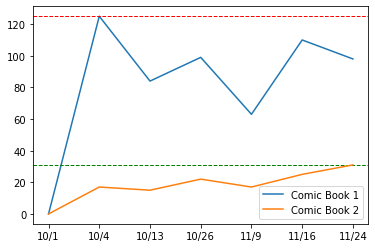

In [40]:
plot_two_fp(dare, darec)

In [41]:
def plot_comic(*args):
    comics = []
    count = 1
    for df in args:
            dates = len(floor_prices(df)) + 1
            date_fp = df[-dates:]
            plot = plt.plot(date_fp[date_fp.columns[::-1]])
            comics.append("Comic" + str(count))
            count += 1
    plt.legend(comics)
    return comics
    

['Comic1', 'Comic2', 'Comic3', 'Comic4']

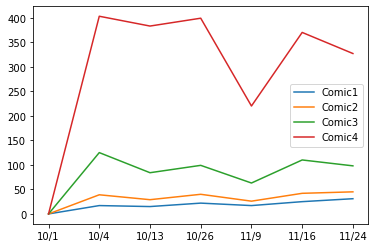

In [42]:
c = select_comic(new_df, "Daredevil #1: Classic")
uc = select_comic(new_df, "Daredevil #1: Vintage")
r = select_comic(new_df, "Daredevil #1: Hero")
ur = select_comic(new_df, "Daredevil #1: Vibranium")
sr = select_comic(new_df, "Daredevil #1: True Believer")

plot_comic(c, uc, r, ur)


['Comic1', 'Comic2', 'Comic3', 'Comic4', 'Comic5']

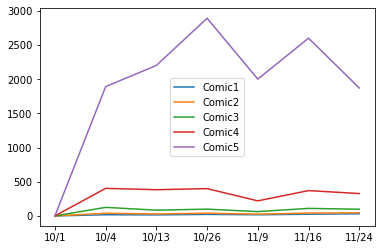

In [43]:
plot_comic(c, uc, r, ur, sr)

20.05263157894737

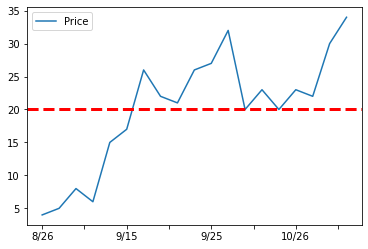

In [45]:
c = select_comic(new_df, "Fantastic Four #1: Classic")
ff_dare = floor_prices(c)
plot_fp(c, ff_dare)